In [1]:
# Loading libraries
library(tidyverse)
library(RColorBrewer)
library(repr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

In [2]:
# Reading, renaming and mutating for factor (pulsar)
star_data <- read_csv("https://raw.githubusercontent.com/luigivicencio/dsci100-003-008/main/HTRU_2.csv", col_names = FALSE) |>
    rename("mean_ip" = X1, "sd_ip" = X2, "kurtosis_ip" = X3, 
           "skew_ip" = X4, "mean_dmsnr" = X5, "sd_dmsnr" = X6, 
           "kurtosis_dmsnr" = X7, "skew_dmsnr" = X8, "pulsar" = X9)|>
    mutate(pulsar = as_factor(pulsar)) |>
    mutate(pulsar = fct_recode(pulsar,"No" = "0", "Yes" = "1"))


star_data

Rows: 17898 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): X1, X2, X3, X4, X5, X6, X7, X8, X9

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


mean_ip   sd_ip    kurtosis_ip  skew_ip     mean_dmsnr  sd_dmsnr 
1     140.56250 55.68378 -0.234571412 -0.69964840  3.1998328  19.110426
2     102.50781 58.88243  0.465318154 -0.51508791  1.6772575  14.860146
3     103.01562 39.34165  0.323328365  1.05116443  3.1212375  21.744669
4     136.75000 57.17845 -0.068414638 -0.63623837  3.6429766  20.959280
5      88.72656 40.67223  0.600866079  1.12349169  1.1789298  11.468720
6      93.57031 46.69811  0.531904850  0.41672112  1.6362876  14.545074
7     119.48438 48.76506  0.031460220 -0.11216757  0.9991639   9.279612
8     130.38281 39.84406 -0.158322759  0.38954045  1.2207358  14.378941
9     107.25000 52.62708  0.452688025  0.17034738  2.3319398  14.486853
10    107.25781 39.49649  0.465881961  1.16287712  4.0794314  24.980418
11    142.07812 45.28807 -0.320328426  0.28395251  5.3762542  29.009897
12    133.25781 44.05824 -0.081059862  0.11536151  1.6321070  12.007806
13    134.96094 49.55433 -0.135303833 -0.08046960 10.6964883  41.342044
14    117.94531 45.50658  0.325437564  0.66145946  2.8361204  23.118350
15    138.17969 51.52448 -0.031852329  0.04679717  6.3302676  31.576347
16    114.36719 51.94572 -0.094498904 -0.28798409  2.7382943  17.191891
17    109.64062 49.01765  0.137635830 -0.25669978  1.5083612  12.072901
18    100.85156 51.74352  0.393836792 -0.01124074  2.8411371  21.635778
19    136.09375 51.69100 -0.045908926 -0.27181639  9.3428094  38.096400
20     99.36719 41.57220  1.547196967  4.15410604 27.5551839  61.719016
21    100.89062 51.89039  0.627486528 -0.02649780  3.8837793  23.045267
22    105.44531 41.13997  0.142653801  0.32041968  3.5518395  20.755017
23     95.86719 42.05992  0.326386917  0.80350179  1.8327759  12.248969
24    117.36719 53.90861  0.257953441 -0.40504908  6.0183946  24.766123
25    106.64844 56.36718  0.378355072 -0.26637161  2.4364549  18.405371
26    112.71875 50.30127  0.279390953 -0.12901071  8.2817726  37.810012
27    130.85156 52.43286  0.142596727  0.01888544  2.6463211  15.654436
28    119.43750 52.87482 -0.002549267 -0.46036029  2.3653846  16.498032
29    123.21094 51.07801  0.179376819 -0.17728516  2.1070234  16.921773
30    102.61719 49.69235  0.230438984  0.19332537  1.4891304  16.004411
⋮     ⋮         ⋮        ⋮            ⋮           ⋮           ⋮        
17869  96.85938 49.82277  0.276811333 -0.33182398   1.7441472 14.764022
17870 137.37500 50.76278  0.085075173 -0.09267941   7.5610368 33.471080
17871 110.76562 55.34219  0.066099851 -0.50041490  14.3795987 45.320742
17872 119.00781 52.09104  0.215293531 -0.02022867   2.0125418 18.754594
17873 139.89844 44.28103 -0.044618449  0.10084109   1.1396321 11.196096
17874  89.45312 35.84883  0.731655618  3.10147356   1.4506689 14.204964
17875 126.55469 54.27589  0.207825362 -0.19168640   2.2943144 17.429850
17876 133.14062 43.70618 -0.012686084  0.23239435   2.0919732 13.489370
17877 111.76562 52.94359  0.671723986  0.38359393 149.8436455 97.926948
17878 118.29688 49.93282  0.144400986 -0.26927317   1.0418060 10.199265
17879  90.14844 40.78604  0.457138562  0.88551621   5.3545150 29.759511
17880 107.66406 44.46246  0.296045688  0.22776530   6.2909699 33.512873
17881 105.49219 43.50072  0.154180228  0.40811660   2.3160535 19.098507
17882 130.50000 46.14955  0.084445004 -0.10735478   1.5292642 11.757086
17883 131.00000 55.93579 -0.023598123 -0.53665128   1.1596990 10.856794
17884  84.42188 41.77556  0.757467101  1.10707476   1.3361204 12.026757
17885 106.87500 47.57133  0.199440015  0.28496422   3.0794314 20.984455
17886 133.82031 43.47816  0.136691092  0.35312123   0.9824415  9.486068
17887 127.07031 47.66356  0.006552426 -0.12363370   0.8536789 11.197206
17888 121.37500 53.24516  0.103772205 -0.36511875   1.0953177 12.239976
17889  98.72656 50.40782  0.565123614  0.24523085   0.5702341  9.011285
17890 126.62500 55.72183  0.002946216 -0.30321814   0.5342809  8.588882
17891 143.67188 45.30265 -0.045768538  0.35364267   5.1739130 26.462345
17892 118.48438 50.60848 -0.029058829 -0.02749

In [3]:
star_split <- initial_split(star_data, prop = 0.75, strata = pulsar)  
star_train <- training(star_split)   
star_test <- testing(star_split)


In [4]:
star_recipe <- recipe(pulsar ~ ., data = star_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors()) |>
    prep()


scaled_star <- bake(star_recipe, star_train)
scaled_star

mean_ip     sd_ip       kurtosis_ip   skew_ip     mean_dmsnr 
1      1.15636049  1.35291810 -0.6715467014 -0.4017806  -0.32174215
2     -0.33377528  1.82485028 -0.0104556788 -0.3716769  -0.37389754
3     -0.31389049 -1.05821888 -0.1445742303 -0.1162054  -0.32443441
4     -0.68374763  0.02716226  0.0524397680 -0.2196895  -0.37530095
5      0.33098864  0.33212181 -0.4202625958 -0.3059566  -0.39712545
6      0.75774688 -0.98409329 -0.5995249105 -0.2241230  -0.38953556
7     -0.14808191  0.90192852 -0.0223856536 -0.2598756  -0.35147158
8      1.21570895 -0.18087679 -0.7525497551 -0.2413454  -0.24718945
9      0.87032540 -0.36232714 -0.5265451004 -0.2688443  -0.37544416
10     0.93701593  0.44857122 -0.5777820441 -0.3007863  -0.06494632
11     0.27072242 -0.14863837 -0.1425819553 -0.1797702  -0.33420102
12     1.06305493  0.73925042 -0.4800653987 -0.2800278  -0.21450999
13     0.13061111  0.80139947 -0.5392391460 -0.3346340  -0.33755202
14    -0.05447042  0.36938965 -0.3199728558 -0.3295312  -0.37968303
15    -0.39863030  0.77156755 -0.0779744546 -0.2894944  -0.33402917
16     0.98137432  0.76381914 -0.4933427649 -0.3319969  -0.11131621
17    -0.39710070  0.79323734  0.1427228531 -0.2919830  -0.29831376
18    -0.59380718 -0.65716181 -0.1416852299 -0.1566017  -0.36857030
19     0.24808435  1.09100769 -0.2063250800 -0.3537285  -0.22519310
20    -0.17163774  1.45374772 -0.0925979418 -0.3311088  -0.34789145
21     0.06606201  0.55877611 -0.1860759615 -0.3087039  -0.14766173
22     0.77610207  0.87327294 -0.3152869673 -0.2845805  -0.34070254
23     0.32915312  0.93847992 -0.4523867588 -0.3627503  -0.35032594
24    -0.32949240  0.46893589 -0.2323142665 -0.2561276  -0.38034178
25    -0.03611523 -0.76660079 -0.3603770216 -0.1762384  -0.39675311
26    -0.43534068 -0.38279786 -0.0006224318 -0.1601927  -0.41012849
27     0.67790179  0.83480148 -0.4965273414 -0.3216297  -0.35688474
28     1.21479119  1.08577678 -0.8946541020 -0.3082041  -0.27984027
29     1.44117191  1.04881432 -0.5737919787 -0.3347755  -0.33912728
30     1.07406804  0.35456376 -0.4873759398 -0.3164079  -0.34766232
⋮     ⋮           ⋮           ⋮             ⋮           ⋮          
13394  0.31814000  1.05155801 -0.29647779   -0.35781369 -0.36318578
13395  0.84371037  0.00773193 -0.58699378   -0.26013468 -0.37011692
13396 -0.83487205 -1.82383247  0.17949994    0.26023152 -0.38509620
13397  0.76784223  0.79064904 -0.31213636   -0.25863812 -0.09384516
13398 -0.73667177 -1.72504156  0.07599090    0.15321820 -0.30762210
13399  0.98779863 -0.92920645 -0.35994072   -0.22419323 -0.36086585
13400 -0.38180470 -1.66024015 -0.01593568    0.06887575 -0.38801759
13401  0.16273270  1.33283507 -0.32502634   -0.35083700 -0.28204563
13402  1.01380182  0.68645392 -0.42711086   -0.31938308 -0.39532106
13403 -0.55495536  0.48817757 -0.18851258   -0.34178476 -0.37160625
13404  1.03154518  0.62686715 -0.36961980   -0.30277787 -0.17235033
13405 -0.01041796  1.30251864 -0.38754322   -0.36928363  0.06121759
13406  0.31232752  0.82284089 -0.24662013   -0.29096043 -0.36241247
13407  0.60784613  1.14519578 -0.25367430   -0.31892691 -0.35276043
13408  0.86573660 -0.41427095 -0.46196164   -0.24975508 -0.35969157
13409  0.28448881  0.50441508 -0.31358273   -0.33158209 -0.39566475
13410 -0.81774054 -0.84511121 -0.01818183   -0.14322434 -0.24793411
13411 -0.13186815 -0.30268823 -0.17034449   -0.25051012 -0.21585612
13412 -0.21691388 -0.44458518 -0.30434560   -0.22109301 -0.35201576
13413  0.78191455  1.39009950 -0.47226877   -0.37519415 -0.39162636
13414 -0.16276606  0.15599733 -0.26159480   -0.24118040 -0.32586646
13415  0.89235163 -0.44791315 -0.32086522   -0.23006331 -0.39769827
13416  0.62803685  0.16960599 -0.44378962   -0.30782683 -0.40210899
13417 -0.48184051  0.57449712  0.08381704   -0.24766131 -0.41181832
13418  1.27811661 -0.17872645 -0.49321016   -0.22997826 -0.25412059
13419  0.29183089  0.60410259 -0.47742676   -0.29214544 -0.41688778
13420 -0.58860655 -0.34242836 -0.08285108   -0.24177096 -0.367

In [5]:
star_table <- group_by(scaled_star, pulsar) |>
    summarize(count = n(),
             missing_values = sum(is.na(star_data)), # check that
             mean_mean_ip = mean(mean_ip), # check that
             mean_sd_ip = mean(sd_ip),
             mean_skew_ip = mean(skew_ip),
             mean_kurtosis_ip = mean(kurtosis_ip),
             mean_mean_dmsnr = mean(mean_dmsnr),
             mean_sd_dmsnr = mean(sd_dmsnr),
             mean_skew_dmsnr = mean(skew_dmsnr),
             mean_kurtosis_dmsnr = mean(kurtosis_dmsnr))

star_table

pulsar count missing_values mean_mean_ip mean_sd_ip mean_skew_ip
1 No     12196 0               0.212225     0.1170446 -0.2252972  
2 Yes     1227 0              -2.109450    -1.1633872  2.2393841  
  mean_kurtosis_ip mean_mean_dmsnr mean_sd_dmsnr mean_skew_dmsnr
1 -0.250710        -0.126049       -0.1546363     0.08225676    
2  2.491979         1.252888        1.5370368    -0.81760674    
  mean_kurtosis_dmsnr
1  0.1234393         
2 -1.2269481

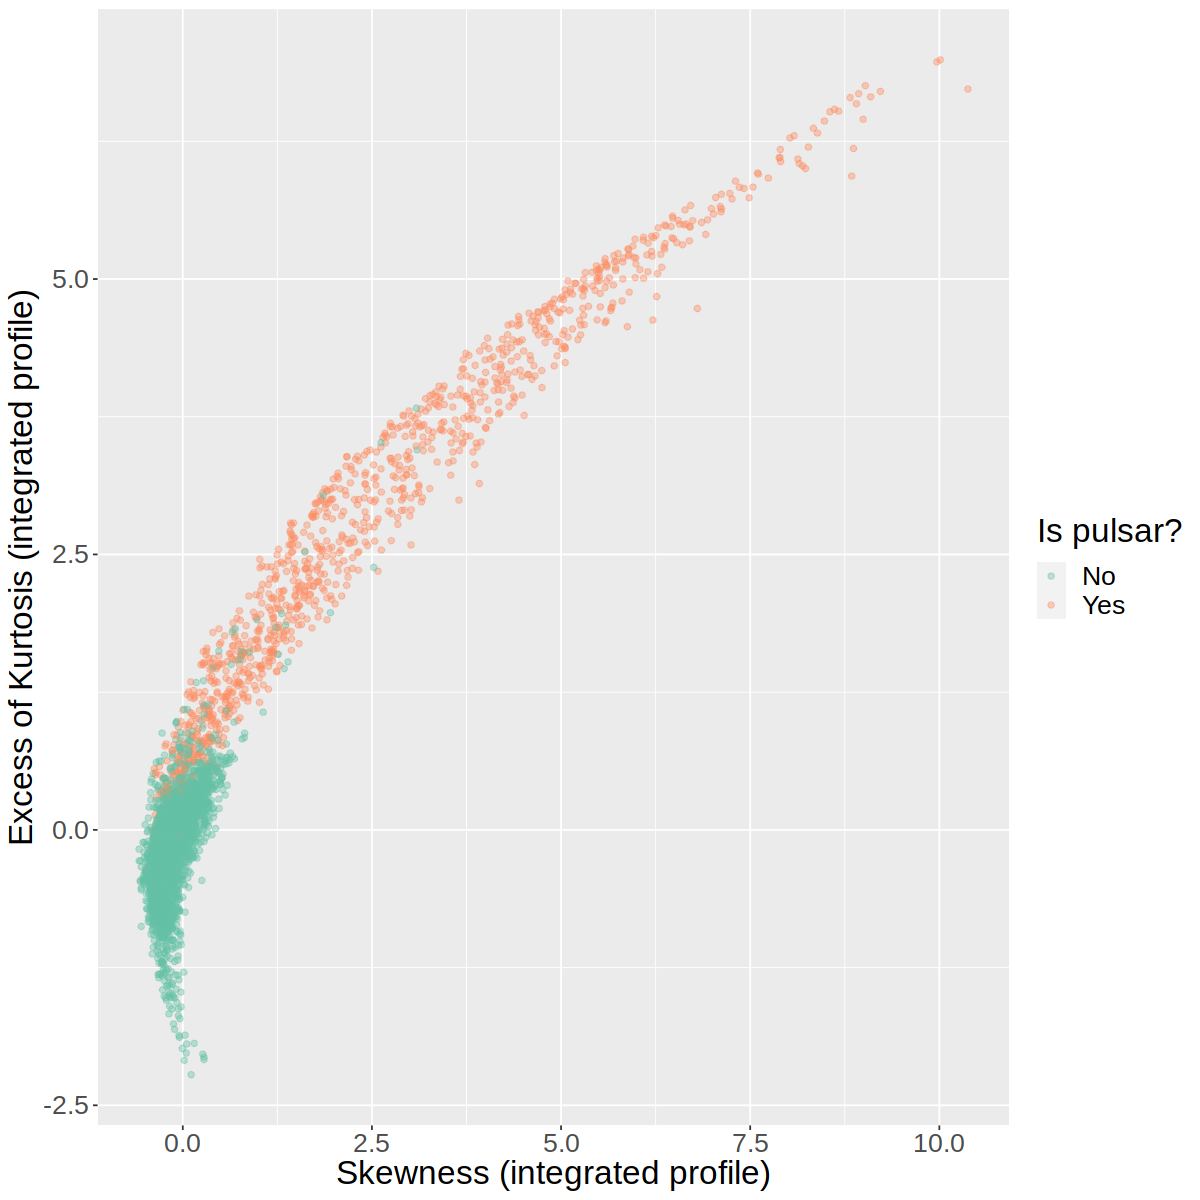

In [6]:
options(repr.plot.width = 10, repr.plot.height = 10)

star_plot_skew <- ggplot (scaled_star, aes(x = skew_ip, y = kurtosis_ip, color = pulsar)) +
                geom_point(alpha = 0.4) +
                labs(y = "Excess of Kurtosis (integrated profile)", x = "Skewness (integrated profile)", color = "Is pulsar?") + 
                theme(text = element_text(size = 20)) + 
                scale_color_brewer(palette = "Set2")


star_plot_skew